# Data Visualizations for NBA Rookies

## Imports  

In [33]:
# important imports for data processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px # library for interactive plots
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
from IPython.display import Image

pd.set_option('display.max_columns', None)

In [2]:
sns.set_palette('dark')
sns.set_style("darkgrid")
#f, ax = plt.subplots(figsize=(10, 8))

## Read in Dataset 

In [3]:
url = "NBArookies2020.csv"

rookies = pd.read_csv("./data/"+url)

In [4]:
rookies.head()

,Player,College,Pos,Tm,GP,TMP,TPTS,TRB,ORB,TAST,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,STL,BLK,TOV,PF,MP,PTS,RB,AST,WS,WS/48,BPM,VORP,TS%,eFG%,DRB,PER,VA,EWA
0,Zion Williamson,Duke,PF,NOP,19.0,565.0,448.0,129.0,55.0,41.0,172.0,292.0,0.589,6.0,13.0,0.462,98.0,152.0,0.645,16.0,9.0,51.0,32.0,29.7,23.6,6.8,2.2,1.8,0.149,2.4,0.6,0.62,0.599,74.0,354.75,152.16,5.1
1,Ja Morant,Murray State,PG,MEM,59.0,1771.0,1041.0,208.0,44.0,409.0,393.0,800.0,0.491,51.0,139.0,0.367,204.0,265.0,0.770,54.0,15.0,191.0,90.0,30.0,17.6,3.5,6.9,3.4,0.093,0.4,1.1,0.57,0.523,164.0,508.67,222.84,7.4
2,RJ Barrett,Duke,SG,NYK,56.0,1704.0,803.0,279.0,50.0,143.0,292.0,727.0,0.402,63.0,197.0,0.320,156.0,254.0,0.614,55.0,17.0,124.0,122.0,30.4,14.3,5.0,2.6,-0.5,-0.015,-4.3,-1.0,0.48,0.445,229.0,315.77,138.51,4.6
3,De'Andre Hunter,Virginia,SF,ATL,63.0,2018.0,778.0,286.0,44.0,112.0,280.0,683.0,0.410,108.0,304.0,0.355,110.0,144.0,0.764,44.0,18.0,103.0,182.0,32.0,12.3,4.5,1.8,0.1,0.001,-4.7,-1.4,0.52,0.489,242.0,403.55,187.73,6.3
4,Darius Garland,Vanderbilt,PG,CLE,59.0,1824.0,728.0,111.0,27.0,229.0,280.0,699.0,0.401,105.0,296.0,0.355,63.0,72.0,0.875,42.0,4.0,151.0,92.0,30.9,12.3,1.9,3.9,-1.3,-0.035,-5.6,-1.7,0.50,0.476,84.0,259.50,114.61,3.8


## Initial Exploratory Data Analysis 

### Distribution Histograms 

In [5]:
fig = px.histogram(rookies, x="GP", marginal="box",
                   hover_data=rookies.columns, barmode='overlay')
fig.update_layout(
    height=500,
    title_text='Games Played by 2019-2020 NBA Rookies '
)

fig.show()

In [6]:
fig = px.histogram(rookies, x="MP", marginal="box",
                   hover_data=rookies.columns, barmode='overlay')
fig.update_layout(
    height=500,
    title_text='Minutes Played by 2019-2020 NBA Rookies'
)

fig.show()

### Scatterplots

In [7]:
fig = px.scatter(rookies, x='PTS', y='AST', color = 'Pos', hover_data = ['Player'])
fig.update_layout(title_text = 'Points vs. Assists Per Game for 2019 NBA Rookies')

In [8]:
fig = px.scatter(rookies, x='BLK', y='STL', color = 'Pos', hover_data = ['Player'])
fig.update_layout(title_text = 'Total Blocks vs. Steals Per Game for 2019 NBA Rookies')

In [9]:
figure = px.scatter(rookies, x='FG%', y = '3P%', hover_data = ['Player'], color = 'Pos')
figure.update_layout(title_text = 'Field Goal % vs. Three Point % for 2019 NBA Rookies')

### Correlation Analysis 

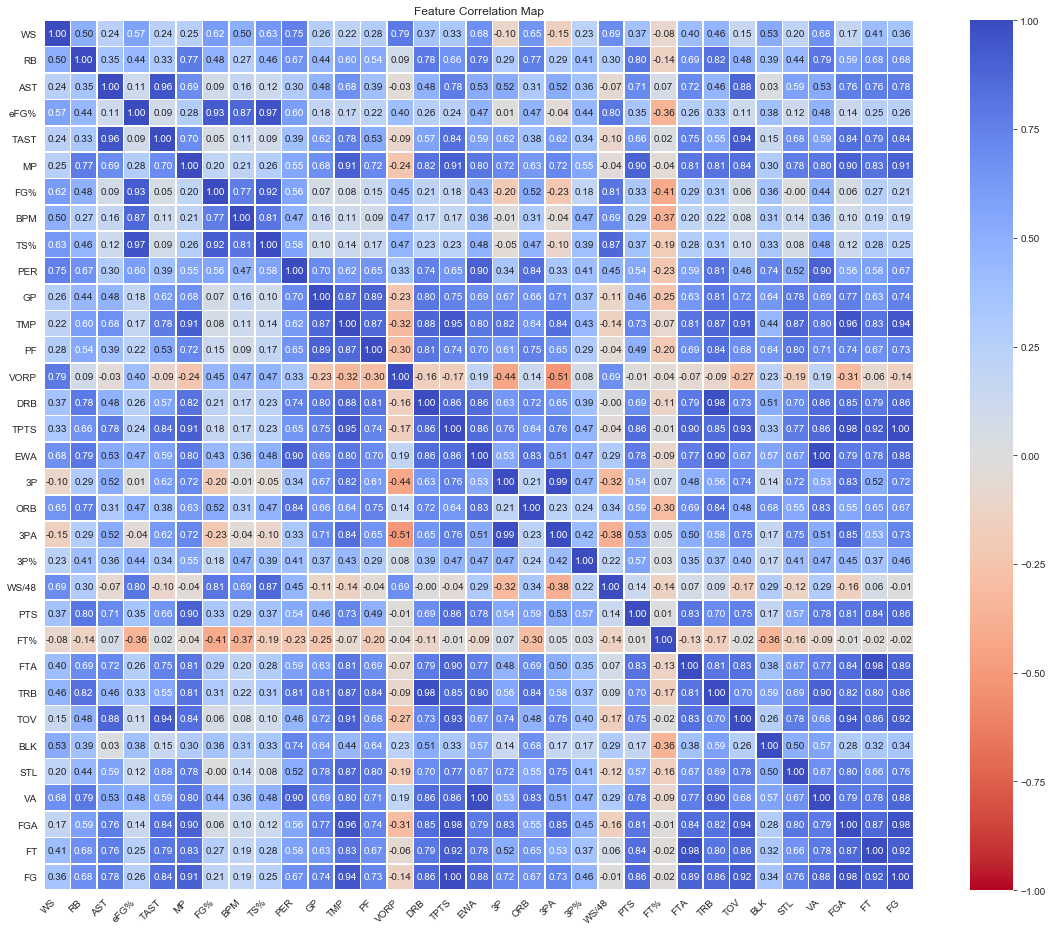

In [10]:
to_heatmap = set(rookies.columns) - set(['Player', 'College' , 'Pos'])
corr = rookies[to_heatmap].corr()
f, ax = plt.subplots(figsize=(20, 16))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap='coolwarm_r',
    square=True, 
    annot=True, fmt='.2f',linewidths=.5, ax=ax
)
ax.set_title('Feature Correlation Map')
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [11]:
corr.iplot(kind='heatmap',colorscale='RdBu',title="Feature Correlation Matrix")

In [12]:
corr.head(32)

,WS,RB,AST,eFG%,TAST,MP,FG%,BPM,TS%,PER,GP,TMP,PF,VORP,DRB,TPTS,EWA,3P,ORB,3PA,3P%,WS/48,PTS,FT%,FTA,TRB,TOV,BLK,STL,VA,FGA,FT,FG
WS,1.000000,0.503171,0.236377,0.574038,0.241320,0.251893,0.616114,0.503713,0.633922,0.753625,0.261637,0.216855,0.280257,0.788052,0.365751,0.326762,0.679168,-0.103434,0.648507,-0.151938,0.231840,0.692515,0.368111,-0.079032,0.398876,0.463104,0.153792,0.526924,0.204331,0.678751,0.174682,0.410952,0.359000
RB,0.503171,1.000000,0.352520,0.437929,0.327472,0.774891,0.476637,0.265860,0.457152,0.668957,0.441160,0.598128,0.535987,0.086845,0.783626,0.663033,0.792414,0.290045,0.765433,0.287778,0.410285,0.295880,0.802225,-0.142424,0.693831,0.823411,0.477183,0.388984,0.438679,0.791525,0.593241,0.677523,0.681180
AST,0.236377,0.352520,1.000000,0.110831,0.960397,0.693555,0.092853,0.164113,0.121824,0.295421,0.475410,0.677207,0.391711,-0.031315,0.477035,0.777278,0.525034,0.521468,0.313660,0.520985,0.362070,-0.068441,0.710774,0.065526,0.717917,0.460055,0.876443,0.031145,0.585397,0.526149,0.762596,0.759132,0.776438
eFG%,0.574038,0.437929,0.110831,1.000000,0.090089,0.278787,0.925804,0.872461,0.967004,0.601255,0.180959,0.172157,0.219558,0.404205,0.256599,0.235652,0.474622,0.006958,0.474916,-0.038759,0.439563,0.799477,0.351350,-0.357285,0.263194,0.330294,0.110526,0.376475,0.121384,0.475385,0.138624,0.250107,0.255952
TAST,0.241320,0.327472,0.960397,0.090089,1.000000,0.700169,0.049331,0.112358,0.090267,0.389149,0.622939,0.780233,0.530974,-0.094574,0.573040,0.840029,0.587388,0.616124,0.376518,0.623227,0.339614,-0.101454,0.655295,0.024842,0.749407,0.552571,0.936756,0.152832,0.680422,0.588696,0.836348,0.790485,0.837248
MP,0.251893,0.774891,0.693555,0.278787,0.700169,1.000000,0.203113,0.207297,0.260160,0.552717,0.675252,0.907421,0.716558,-0.241179,0.819741,0.910005,0.798220,0.716159,0.627671,0.722882,0.549962,-0.036389,0.896410,-0.044365,0.809282,0.814550,0.836454,0.295254,0.778353,0.798392,0.903011,0.827015,0.905617
FG%,0.616114,0.476637,0.092853,0.925804,0.049331,0.203113,1.000000,0.771250,0.924093,0.555293,0.071242,0.076912,0.148129,0.447552,0.211984,0.176378,0.434835,-0.202870,0.524678,-0.233649,0.181012,0.810838,0.327087,-0.408305,0.289273,0.308664,0.058035,0.363014,-0.001494,0.435796,0.057151,0.265264,0.208265
BPM,0.503713,0.265860,0.164113,0.872461,0.112358,0.207297,0.771250,1.000000,0.808724,0.472407,0.158122,0.111423,0.093380,0.467531,0.171390,0.170623,0.362337,-0.006265,0.308928,-0.044134,0.472897,0.691392,0.289372,-0.368266,0.196404,0.218373,0.084611,0.309327,0.138842,0.362778,0.095294,0.187374,0.185759
TS%,0.633922,0.457152,0.121824,0.967004,0.090267,0.260160,0.924093,0.808724,1.000000,0.583685,0.097081,0.137592,0.174611,0.468605,0.231948,0.231634,0.481679,-0.046348,0.472016,-0.097114,0.388917,0.870249,0.370012,-0.192670,0.280726,0.310121,0.095227,0.333008,0.075030,0.482397,0.116792,0.282960,0.251917
PER,0.753625,0.668957,0.295421,0.601255,0.389149,0.552717,0.555293,0.472407,0.583685,1.000000,0.700731,0.620896,0.654125,0.333212,0.743968,0.646482,0.903427,0.341167,0.842887,0.325833,0.406085,0.453264,0.538559,-0.230024,0.587900,0.813169,0.458089,0.735085,0.520284,0.903707,0.560772,0.579881,0.672988


In [13]:
fig = px.scatter_matrix(rookies, dimensions=["MP", "PTS", "RB", "AST"], title="2019 NBA Rookies Per Game Stats", color ='Pos', hover_data = ['Player'])

fig.show()

We were able to perform some initial EDA with the metrics above, but wanted to add more variables to our analysis of rookies. 

## Analysis of Advanced Metrics

We decided to evaluate some advanced metrics in our Rookies dataset to determine underlying player trends, etc. 

See all calculations in the "Preprocessing - NBA Rookies Data" notebook

### True Shooting Percentage 

True shooting percentage is a statistic that measures of shooting efficiency that takes into account field goals, 3-point field goals, and free throws. The formula is PTS / (2 * (FGA + 0.44 * FTA)). We only took players that played in at least 50% of the season's games (63-67 games played by each team). 

In [27]:
sortedTS = rookies.sort_values(['TS%'], ascending=False)
sortedTS = sortedTS.loc[sortedTS['GP'] >= 33]

In [28]:
fig = px.bar(sortedTS[:10], x='TS%', y='Player', orientation = 'h', color_discrete_sequence =['green']*10 )
fig.update_layout(
    title="Top 10 True Shooting % Among 2019 NBA Rookies",
    xaxis_title="True Shooting %",
    yaxis_title="Player",
    yaxis={'categoryorder':'total ascending'}
    )
fig.show()

### Player Efficiency Rating

The Player Efficiency Rating (PER) is a per-minute rating developed by ESPN.com columnist John Hollinger. In John's words, "The PER sums up all a player's positive accomplishments, subtracts the negative accomplishments, and returns a per-minute rating of a player's performance." 

PER takes into account accomplishments, such as field goals, free throws, 3-pointers, assists, rebounds, blocks and steals, and negative results, such as missed shots, turnovers and personal fouls. The formula adds positive stats and subtracts negative ones through a statistical point value system. The rating for each player is then adjusted to a per-minute basis so that, for example, substitutes can be compared with starters in playing time debates. It is also adjusted for the team's pace. In the end, one number sums up the players' statistical accomplishments for that season.

The league average is 15.00 every season.

In [ ]:
Image(filename='output1.png')

In [17]:
sortedPER = rookies.sort_values(['PER'], ascending=False)
sortedPER.head(10)

,Player,College,Pos,Tm,GP,TMP,TPTS,TRB,ORB,TAST,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,STL,BLK,TOV,PF,MP,PTS,RB,AST,WS,WS/48,BPM,VORP,TS%,eFG%,DRB,PER,VA,EWA
17,Brandon Clarke,Gonzaga,PF,MEM,50.0,1086.0,602.0,292.0,78.0,72.0,254.0,408.0,0.623,21.0,52.0,0.404,73.0,93.0,0.785,26.0,42.0,46.0,82.0,21.7,12.0,5.8,1.4,4.4,0.192,3.5,1.5,0.67,0.648,214.0,1008.45,322.89,10.8
7,Jaxson Hayes,Texas,C,NOP,56.0,951.0,420.0,223.0,82.0,51.0,155.0,235.0,0.660,1.0,4.0,0.250,109.0,173.0,0.630,23.0,53.0,41.0,142.0,17.0,7.5,4.0,0.9,3.5,0.176,0.1,0.5,0.67,0.662,141.0,760.79,190.35,6.3
32,Eric Paschall,Villanova,PF,GSW,60.0,1654.0,837.0,275.0,82.0,127.0,318.0,640.0,0.497,37.0,129.0,0.287,164.0,212.0,0.774,32.0,13.0,94.0,125.0,27.6,14.0,4.6,2.1,2.1,0.062,-2.7,-0.3,0.57,0.526,193.0,608.58,245.96,8.2
10,Cameron Johnson,UNC,PF,PHO,49.0,996.0,398.0,140.0,39.0,52.0,136.0,325.0,0.418,91.0,229.0,0.397,35.0,46.0,0.761,30.0,16.0,29.0,72.0,20.3,8.1,2.9,1.1,1.8,0.086,-0.2,0.5,0.58,0.558,101.0,554.78,164.61,5.5
28,Bruno Fernando,Maryland,C,ATL,56.0,713.0,240.0,198.0,67.0,49.0,103.0,199.0,0.518,5.0,37.0,0.135,29.0,51.0,0.569,18.0,17.0,42.0,107.0,12.7,4.3,3.5,0.9,0.8,0.055,-4.1,-0.4,0.54,0.530,131.0,552.91,102.80,3.4
6,Coby White,UNC,SG,CHI,65.0,1674.0,859.0,230.0,28.0,175.0,312.0,792.0,0.394,133.0,376.0,0.354,102.0,129.0,0.791,49.0,6.0,109.0,117.0,25.8,13.2,3.5,2.7,0.9,0.026,-2.8,-0.3,0.51,0.478,202.0,522.78,197.27,6.6
1,Ja Morant,Murray State,PG,MEM,59.0,1771.0,1041.0,208.0,44.0,409.0,393.0,800.0,0.491,51.0,139.0,0.367,204.0,265.0,0.770,54.0,15.0,191.0,90.0,30.0,17.6,3.5,6.9,3.4,0.093,0.4,1.1,0.57,0.523,164.0,508.67,222.84,7.4
5,Jarrett Culver,Texas Tech,SG,MIN,63.0,1506.0,580.0,212.0,70.0,110.0,230.0,569.0,0.404,66.0,221.0,0.299,54.0,117.0,0.462,57.0,38.0,81.0,125.0,23.9,9.2,3.4,1.7,-0.1,-0.004,-4.0,-0.8,0.47,0.462,142.0,483.84,168.85,5.6
15,Goga Bitadze,NaN,C,IND,49.0,410.0,152.0,96.0,22.0,21.0,61.0,129.0,0.473,6.0,36.0,0.167,24.0,33.0,0.727,6.0,32.0,25.0,57.0,8.4,3.1,2.0,0.4,0.6,0.069,-2.5,0.0,0.53,0.496,74.0,466.76,57.19,1.9
8,Rui Hachimura,Gonzaga,PF,WAS,41.0,1217.0,548.0,248.0,63.0,70.0,218.0,456.0,0.478,20.0,73.0,0.274,92.0,111.0,0.829,34.0,7.0,41.0,89.0,29.7,13.4,6.0,1.7,1.7,0.066,-3.0,-0.3,0.54,0.500,185.0,460.33,198.96,6.6


In [18]:
fig = px.bar(sortedPER[:10], x='PER', y='Player', orientation = 'h', color_discrete_sequence =['green']*10)
fig.update_layout(
    title="Top 10 PER Among 2019 NBA Rookies",
    xaxis_title="PER",
    yaxis_title="Player",
    yaxis={'categoryorder':'total ascending'}
    )
fig.show()

### Estimated Wins Added (based on Value Added)

VA = Value Added is the estimated number of points a player adds to a team’s season total above what a "replacement player" (for instance, the 12th man on the roster) would produce. Value Added = ([Minutes * (PER - PRL)] / 67). PRL (Position Replacement Level) = 11.5 for power forwards, 11.0 for point guards, 10.6 for centers, 10.5 for shooting guards and small forwards.

Dividing Value Added by 30 gives Estimated Wins Added, giving the estimated number of wins a player adds to a team’s season total above what a "replacement player" would produce.

In [41]:
sortedEWA = rookies.sort_values(['EWA'], ascending=False)
sortedEWA.head()

,Player,College,Pos,Tm,GP,TMP,TPTS,TRB,ORB,TAST,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,STL,BLK,TOV,PF,MP,PTS,RB,AST,WS,WS/48,BPM,VORP,TS%,eFG%,DRB,PER,VA,EWA
17,Brandon Clarke,Gonzaga,PF,MEM,50.0,1086.0,602.0,292.0,78.0,72.0,254.0,408.0,0.623,21.0,52.0,0.404,73.0,93.0,0.785,26.0,42.0,46.0,82.0,21.7,12.0,5.8,1.4,4.4,0.192,3.5,1.5,0.67,0.648,214.0,1008.45,322.89,10.8
32,Eric Paschall,Villanova,PF,GSW,60.0,1654.0,837.0,275.0,82.0,127.0,318.0,640.0,0.497,37.0,129.0,0.287,164.0,212.0,0.774,32.0,13.0,94.0,125.0,27.6,14.0,4.6,2.1,2.1,0.062,-2.7,-0.3,0.57,0.526,193.0,608.58,245.96,8.2
1,Ja Morant,Murray State,PG,MEM,59.0,1771.0,1041.0,208.0,44.0,409.0,393.0,800.0,0.491,51.0,139.0,0.367,204.0,265.0,0.770,54.0,15.0,191.0,90.0,30.0,17.6,3.5,6.9,3.4,0.093,0.4,1.1,0.57,0.523,164.0,508.67,222.84,7.4
8,Rui Hachimura,Gonzaga,PF,WAS,41.0,1217.0,548.0,248.0,63.0,70.0,218.0,456.0,0.478,20.0,73.0,0.274,92.0,111.0,0.829,34.0,7.0,41.0,89.0,29.7,13.4,6.0,1.7,1.7,0.066,-3.0,-0.3,0.54,0.500,185.0,460.33,198.96,6.6
6,Coby White,UNC,SG,CHI,65.0,1674.0,859.0,230.0,28.0,175.0,312.0,792.0,0.394,133.0,376.0,0.354,102.0,129.0,0.791,49.0,6.0,109.0,117.0,25.8,13.2,3.5,2.7,0.9,0.026,-2.8,-0.3,0.51,0.478,202.0,522.78,197.27,6.6


In [42]:
fig = px.bar(sortedEWA[:10], x='EWA', y='Player', orientation = 'h', color_discrete_sequence =['green']*10)
fig.update_layout(
    title="Top 10 Estimated Wins Added Among 2019 NBA Rookies",
    xaxis_title="EWA (games)",
    yaxis_title="Player",
    yaxis={'categoryorder':'total ascending'}
    )
fig.show()

### Box Plus/Minus 

Box Plus/Minus (BPM) is a basketball box score-based metric that estimates a basketball player’s contribution to the team when that player is on the court. 

BPM uses a player’s box score information, position, and the team’s overall performance to estimate the player’s contribution in points above league average per 100 possessions played. BPM does not take into account playing time -- it is purely a rate stat!

League average is defined as 0.0, meaning 0 points above average or below average. Because above-average players play more minutes, there are far more below-average players than above-average players in the league at any time. A value of +5.0 means the team is 5 points per 100 possessions better with the player on the floor than with average production from another player.

To give a sense of the scale:

+10.0 is an all-time season (think peak Jordan or LeBron)
<br>
+8.0 is an MVP season (think peak Dirk or peak Shaq)
<br>
+6.0 is an all-NBA season
<br>
+4.0 is in all-star consideration
<br>
+2.0 is a good starter
<br>
+0.0 is a decent starter or solid 6th man
<br>
-2.0 is a bench player (this is also defined as "replacement level")
<br>
Below -2.0 are many end-of-bench players

In [21]:
sortedBPM = rookies.sort_values(['BPM'], ascending=False)
sortedBPM.head()

,Player,College,Pos,Tm,GP,TMP,TPTS,TRB,ORB,TAST,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,STL,BLK,TOV,PF,MP,PTS,RB,AST,WS,WS/48,BPM,VORP,TS%,eFG%,DRB,PER,VA,EWA
17,Brandon Clarke,Gonzaga,PF,MEM,50.0,1086.0,602.0,292.0,78.0,72.0,254.0,408.0,0.623,21.0,52.0,0.404,73.0,93.0,0.785,26.0,42.0,46.0,82.0,21.7,12.0,5.8,1.4,4.4,0.192,3.5,1.5,0.67,0.648,214.0,1008.45,322.89,10.8
26,KZ Okpala,Stanford,SF,MIA,5.0,26.0,7.0,5.0,1.0,1.0,3.0,5.0,0.600,0.0,1.0,0.000,1.0,2.0,0.500,2.0,1.0,1.0,2.0,5.2,1.4,1.0,0.2,0.1,0.119,2.7,0.0,0.60,0.600,4.0,62.11,4.01,0.1
0,Zion Williamson,Duke,PF,NOP,19.0,565.0,448.0,129.0,55.0,41.0,172.0,292.0,0.589,6.0,13.0,0.462,98.0,152.0,0.645,16.0,9.0,51.0,32.0,29.7,23.6,6.8,2.2,1.8,0.149,2.4,0.6,0.62,0.599,74.0,354.75,152.16,5.1
22,Mfiondu Kabengele,Florida State,C,LAC,12.0,64.0,42.0,11.0,1.0,2.0,14.0,32.0,0.438,9.0,20.0,0.450,5.0,5.0,1.000,2.0,2.0,2.0,9.0,5.3,3.5,0.9,0.2,0.2,0.175,2.1,0.1,0.61,0.578,10.0,203.80,15.28,0.5
1,Ja Morant,Murray State,PG,MEM,59.0,1771.0,1041.0,208.0,44.0,409.0,393.0,800.0,0.491,51.0,139.0,0.367,204.0,265.0,0.770,54.0,15.0,191.0,90.0,30.0,17.6,3.5,6.9,3.4,0.093,0.4,1.1,0.57,0.523,164.0,508.67,222.84,7.4


In [34]:
import plotly.graph_objects as go

colors = ['Green','Green','Green','Green','Green','Green','Green','Red','Red','Red']

fig = go.Figure(data=[go.Bar(
    x=sortedBPM['BPM'][:10],
    y=sortedBPM['Player'][:10],
    orientation = 'h',
    marker_color=colors# marker color can be a single color value or an iterable
)])
fig.update_layout(
    title="Top 10 Box Plus/Minus Among 2019 NBA Rookies",
    xaxis_title="Box Plus/Minus",
    yaxis_title="Player",
    yaxis={'categoryorder':'total ascending'},
    )
fig.show()

 ### Win Shares (per 48 minutes)

Win Shares is a player statistic which attempts to divvy up credit for team success to the individuals on the team.

Calculate points produced for each player.
<br>
Calculate offensive possessions for each player. 
<br>
Calculate marginal offense for each player. Marginal offense is equal to (points produced) - 0.92 * (league points per possession) * (offensive possessions). 
<br>
Calculate marginal points per win. Marginal points per win reduces to 0.32 * (league points per game) * ((team pace) / (league pace)). 
<br>
Credit Offensive Win Shares to the players. Offensive Win Shares are credited using the following formula: (marginal offense) / (marginal points per win). 

In [37]:
sortedWS = rookies.sort_values(['WS/48'], ascending=False)
sortedWS.head()

,Player,College,Pos,Tm,GP,TMP,TPTS,TRB,ORB,TAST,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,STL,BLK,TOV,PF,MP,PTS,RB,AST,WS,WS/48,BPM,VORP,TS%,eFG%,DRB,PER,VA,EWA
17,Brandon Clarke,Gonzaga,PF,MEM,50.0,1086.0,602.0,292.0,78.0,72.0,254.0,408.0,0.623,21.0,52.0,0.404,73.0,93.0,0.785,26.0,42.0,46.0,82.0,21.7,12.0,5.8,1.4,4.4,0.192,3.5,1.5,0.67,0.648,214.0,1008.45,322.89,10.8
7,Jaxson Hayes,Texas,C,NOP,56.0,951.0,420.0,223.0,82.0,51.0,155.0,235.0,0.660,1.0,4.0,0.250,109.0,173.0,0.630,23.0,53.0,41.0,142.0,17.0,7.5,4.0,0.9,3.5,0.176,0.1,0.5,0.67,0.662,141.0,760.79,190.35,6.3
22,Mfiondu Kabengele,Florida State,C,LAC,12.0,64.0,42.0,11.0,1.0,2.0,14.0,32.0,0.438,9.0,20.0,0.450,5.0,5.0,1.000,2.0,2.0,2.0,9.0,5.3,3.5,0.9,0.2,0.2,0.175,2.1,0.1,0.61,0.578,10.0,203.80,15.28,0.5
0,Zion Williamson,Duke,PF,NOP,19.0,565.0,448.0,129.0,55.0,41.0,172.0,292.0,0.589,6.0,13.0,0.462,98.0,152.0,0.645,16.0,9.0,51.0,32.0,29.7,23.6,6.8,2.2,1.8,0.149,2.4,0.6,0.62,0.599,74.0,354.75,152.16,5.1
25,Nicolas Claxton,Georgia,PF,BRK,15.0,187.0,66.0,44.0,19.0,16.0,27.0,48.0,0.563,1.0,7.0,0.143,11.0,21.0,0.524,1.0,8.0,9.0,14.0,12.5,4.4,2.9,1.1,0.5,0.124,-0.7,0.1,0.58,0.573,25.0,171.18,29.79,1.0


In [38]:
fig = px.bar(sortedVA[:10], x='VA', y='Player', orientation = 'h', color_discrete_sequence =['green']*10)
fig.update_layout(
    title="Top 10 Value Added Among 2019 NBA Rookies",
    xaxis_title="Value Added",
    yaxis_title="Player",
    yaxis={'categoryorder':'total ascending'}
    )
fig.show()

Win shares vs Estimated Wins Added

In [35]:
figure = px.scatter(rookies, x='WS/48', y = 'EWA', color = 'Pos',hover_data = ['Player'])
figure.update_layout(title_text = 'Win Shares vs. Estimated Wins Added for 2019 NBA Rookies')
